# TP Python 1A
# Reflection d'onde dans une cavité concave
## Thomas Darley

# Partie I : Vie d'un rayon
## a) Ellipse

On va dans ce projet, étudier la propagation d'onde circulaires et sphériques dans différentes cavités. On se propose, pour commencer, d'étudier la vie d'un rayon, c'est à dire la trajectoire d'une particule entre 0 et tf avec des conditions initiales données.

In [2]:
## useful imports

import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

## useful functions

norm2=lambda vec : np.sqrt(vec[0]**2+vec[1]**2)

def normal_ell(x1,y1,rx,ry) : #normal at x1,y1 on an rx,ry ellipse 
    normal=np.array([ry/rx*x1,rx/ry*y1])
    #normal=-np.array([2*x/rx**2,2*y/ry**2])
    return normal/norm2(normal)

##core

tf=100

rx,ry=2,1 #semi-major (x) and semi-minor (y) axis

def ray_life_ell(tf,p=(rx*random.random(),ry*random.random()),a=np.pi*2*random.random()):
    '''function giving the life of a ray between t=0 and tf as a list of its bouncing points with the outer ellipse. 
    Takes tf, and the starting chars as input. By default, they are taken at random'''

    #initiating the chars
    x=p[0]
    y=p[1]
    vx = np.cos(a)
    vy = np.sin(a)    
    
    
    
    while (x/rx)**2+(y/ry)**2>1: #making sure it's inside
        x,y=rx*random.random(),ry*random.random() #else, random starting point

    bounce_list=[[x,y,vx,vy,0]] #initiating the returned list
    time=0

    while time<tf:   
        
        #solves 'p=p0+Lv && p is on the boundary' keeping the positive value (of time)         
                     
        A=(vx/rx)**2+(vy/ry)**2
        B=vx*x/rx**2+vy*y/ry**2
        C=(x/rx)**2+(y/ry)**2-1

        delta=B**2-A*C
        Lambda=(-B+np.sqrt(delta))/A

        new_x=x+Lambda*vx
        new_y=y+Lambda*vy

        #initial vector
        vec_i=np.array([vx,vy])

        #normal vector (normalized)
        vec_n=normal_ell(new_x,new_y,rx,ry) 

        #reflection vector
        vec_r=vec_i-2*vec_n*np.vdot(vec_n,vec_i)

        #normalized reflection vector
        vec_r=vec_r/norm2(vec_r)

        vx=vec_r[0]
        vy=vec_r[1]
        x=new_x
        y=new_y

        time+=Lambda
        bounce_list.append([new_x,new_y,vx,vy,time])
                 
    return np.array(bounce_list)

On obtient ainsi la vie de tout rayon dans l'ellipse (avec rx,ry,tf,p,a variables)


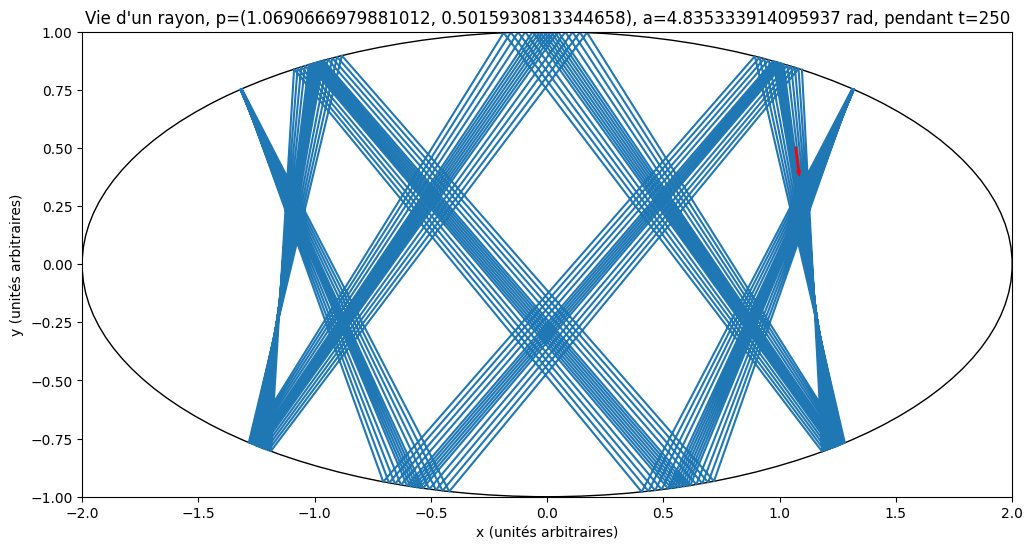

In [15]:
rx,ry=2,1 #semi-major (x) and semi-minor (y) axis
tf=250
p=(rx*random.random(),ry*random.random())
a=2*np.pi*random.random()

life=ray_life_ell(tf,p,a)
fig,ax=plt.subplots(figsize=[12,12],dpi=100)
ax.plot(life[:,0],life[:,1])
ax.add_artist(Ellipse((0,0),2*rx,2*ry,fill=False))
ax.set_xlim([-rx,rx])
ax.set_ylim([-ry,ry])
ax.set_aspect('equal')
ax.set_title('Vie d\'un rayon, p='+str(p)+', a='+str(a)+' rad, pendant t='+str(tf))
ax.set_xlabel('x (unités arbitraires)')
ax.set_ylabel('y (unités arbitraires)')

ax.arrow(life[0,0],life[0,1],life[0,2]/10,life[0,3]/10,width=0.005,color='r',zorder=1000)

Quelques résultats intéressants peuvent ressortir de cette étude.
Le premier est qu'un couple (p,a) initial ne peut créer que 2 situations : soit le rayon est entre les points focaux et il y reste, soit il en est hors et il restera hors de ceux-ci. Ce phénomène est illustré ci-après.

Text(0, 0.5, 'y (unités arbitraires)')

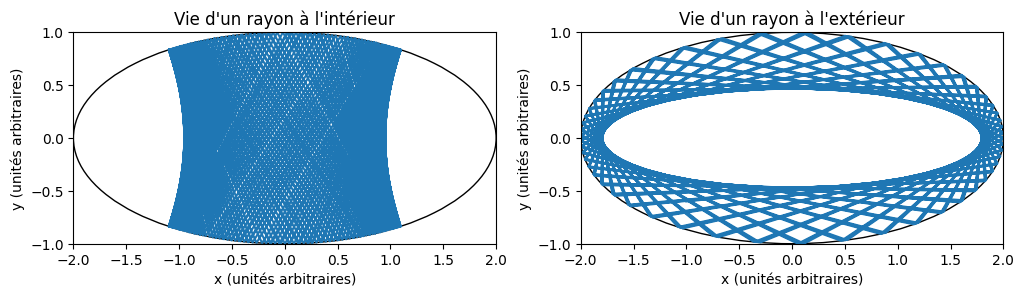

In [3]:
rx,ry=2,1 #semi-major (x) and semi-minor (y) axis
tf=500

p_out=(-1,-0.6)
a_out=0.1

p_in=(-1,-0.6)
a_in=np.pi/2-0.1

fig,ax=plt.subplots(1,2,figsize=[12,6],dpi=100)
life_inside=ray_life_ell(tf,p_in,a_in)
life_outside=ray_life_ell(tf,p_out,a_out)
ax[0].plot(life_inside[:,0],life_inside[:,1])
ax[1].plot(life_outside[:,0],life_outside[:,1])

ax[0].add_artist(Ellipse((0,0),2*rx,2*ry,fill=False))
ax[0].set_xlim([-rx,rx])
ax[0].set_ylim([-ry,ry])
ax[0].set_aspect('equal')
ax[0].set_title('Vie d\'un rayon à l\'intérieur')
ax[0].set_xlabel('x (unités arbitraires)')
ax[0].set_ylabel('y (unités arbitraires)')

ax[1].add_artist(Ellipse((0,0),2*rx,2*ry,fill=False))
ax[1].set_xlim([-rx,rx])
ax[1].set_ylim([-ry,ry])
ax[1].set_aspect('equal')
ax[1].set_title('Vie d\'un rayon à l\'extérieur')
ax[1].set_xlabel('x (unités arbitraires)')
ax[1].set_ylabel('y (unités arbitraires)')

Sans trop rentrer dans les détails mathématiques, ce billiard elliptique est profondément non-ergodique.\
Bien sûr, la version plus simple de ce billiard, le billard circulaire est également non-ergodique étant donné qu'à moins que le point de départ ne se trouve au centre du cercle, un petit cercle au centre ne sera jamais visité par le rayon :

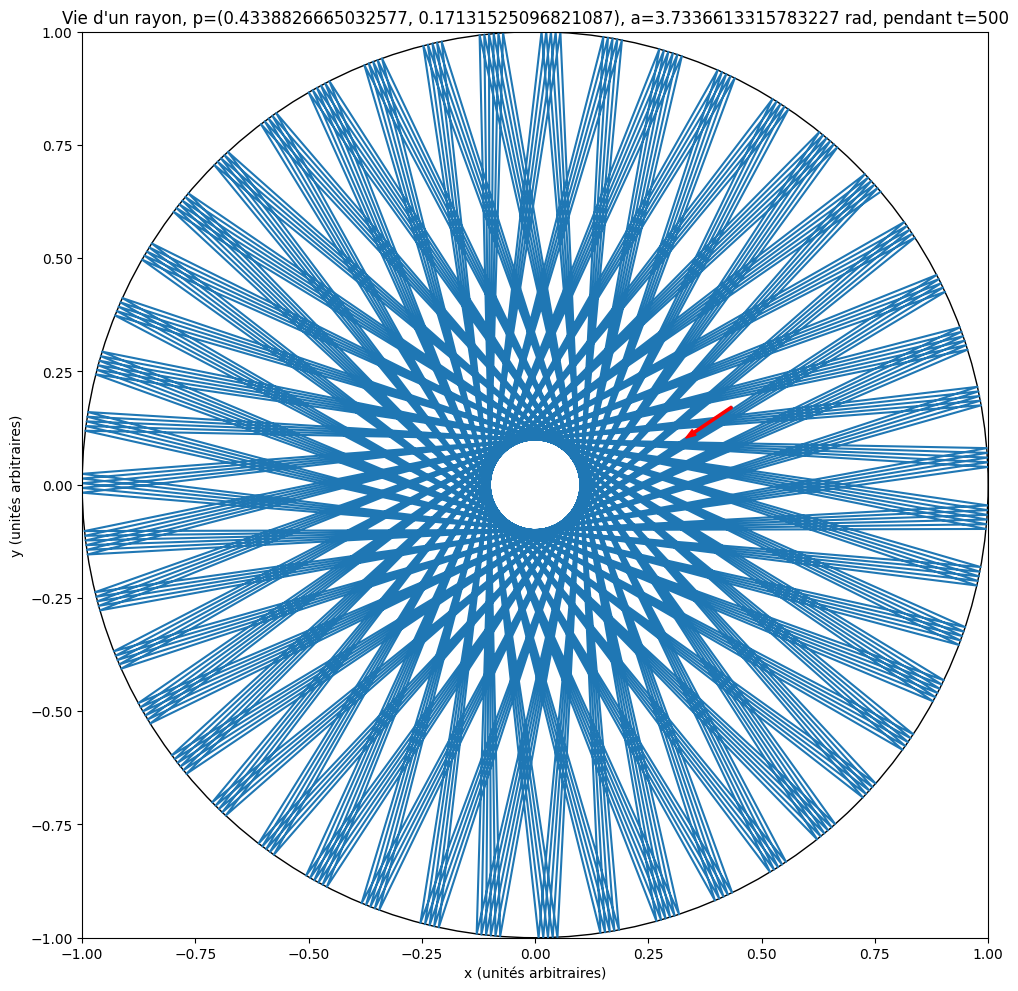

In [16]:
rx,ry=1,1 #semi-major (x) and semi-minor (y) axis
tf=500
p=(rx*random.random(),ry*random.random())
a=2*np.pi*random.random()

life=ray_life_ell(tf,p,a)
fig,ax=plt.subplots(figsize=[12,12],dpi=100)
ax.plot(life[:,0],life[:,1])
ax.add_artist(Ellipse((0,0),2*rx,2*ry,fill=False))
ax.set_xlim([-rx,rx])
ax.set_ylim([-ry,ry])
ax.set_aspect('equal')
ax.set_title('Vie d\'un rayon, p='+str(p)+', a='+str(a)+' rad, pendant t='+str(tf))
ax.set_xlabel('x (unités arbitraires)')
ax.set_ylabel('y (unités arbitraires)')
ax.arrow(life[0,0],life[0,1],life[0,2]/10,life[0,3]/10,width=0.005,color='r',zorder=1000)

## b) Le rectangle

Une autre forme non-ergodique, peut-être celle par excellence, est le rectangle

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

## useful functions
norm2=lambda vec : np.sqrt(vec[0]**2+vec[1]**2)
##core

eps=1E-15
tf=500

lx_rect,ly_rect=1.5,1 #lengths of the rectangle

def ray_life_rect(tf,p=(lx_rect/2*(random.random()+1),ly_rect/2*(random.random()+1)),a=np.pi*2*random.random()):
    '''function giving the life of a ray between t=0 and tf as a list of its bouncing points with the outer rectangle. 
    Takes tf, and the starting chars as input. By default, they are taken at random'''
    #initial conditions
    x,y=p[0],p[1]

    vx = np.cos(a)
    vy = np.sin(a)

    bounce_list=[[x,y,vx,vy,0]]
    time=0

    while time<tf:
        
        #here, we solve 'p=p0+L*v && p in on one of the edges'
        Lambda_list=np.array([(ly_rect-y)/vy,-y/vy,-x/vx,(lx_rect-x)/vx]) #every possible lambda value
        Lambda_list=Lambda_list[Lambda_list>0] #keeping the positive ones

        xlist=x+Lambda_list*vx
        xlist[abs(xlist)<eps]=0 #rounding for eaasier tests later
        xlist[abs(xlist-lx_rect)<eps]=lx_rect #rounding for eaasier tests later

        ylist=y+Lambda_list*vy
        ylist[abs(ylist)<eps]=0 #rounding for eaasier tests later
        ylist[abs(ylist-ly_rect)<eps]=ly_rect #rounding for eaasier tests later

        xylist=np.array([[xlist[0],ylist[0]],[xlist[1],ylist[1]]]) #all possible coordinates from the previous part
        for i,pos in enumerate(xylist):

            if pos[0]>lx_rect or pos[0]<0: #if the previous lambdas yield a result outta the box, they are scrapped
                xylist=xylist[(i+1)%2]
                Lambda=Lambda_list[(i+1)%2]

            if pos[1]>ly_rect or pos[1]<0:
                xylist=xylist[(i+1)%2]
                Lambda=Lambda_list[(i+1)%2]

        time=time+Lambda #the remaining value determines the time and new point
        x=xylist[0]
        y=xylist[1]


        if x==0 or x==lx_rect: #if its on a vertical wall, vx is inversed
            vx=-vx
        elif y==0 or y==ly_rect: #if its on an horizontal wall, vy is inversed
            vy=-vy

        bounce_list.append([x,y,vx,vy,time])
    return np.array(bounce_list)

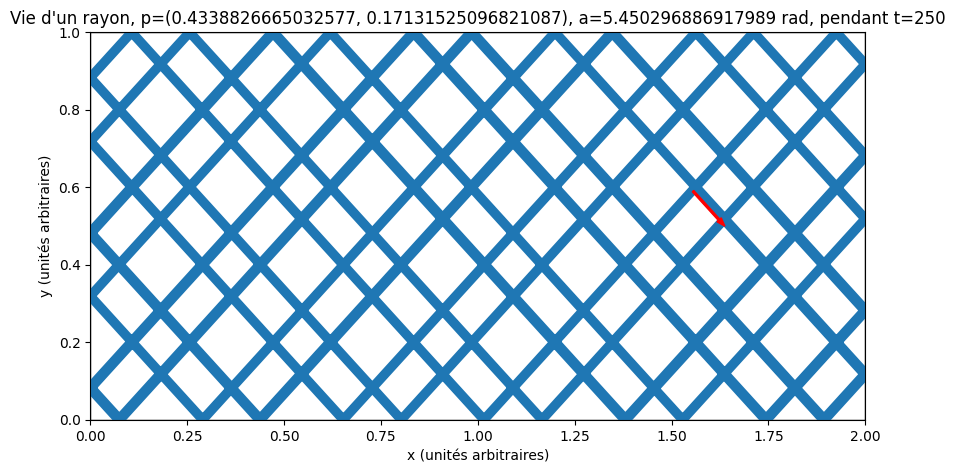

In [27]:
lx_rect,ly_rect=2,1
x,y=lx_rect/2*(random.random()+1),ly_rect/2*(random.random()+1)
a=2*np.pi*random.random()
tf=250

life=ray_life_rect(tf,(x,y),a)

fig,ax=plt.subplots(figsize=[10,10],dpi=100)
ax.plot(life[:,0],life[:,1])
ax.add_artist(Rectangle((0,0),lx_rect,ly_rect,fill=False))
ax.set_xlim([0,lx_rect])
ax.set_ylim([0,ly_rect])
ax.set_aspect('equal')
ax.set_title('Vie d\'un rayon, p='+str(p)+', a='+str(a)+' rad, pendant t='+str(tf))
ax.set_xlabel('x (unités arbitraires)')
ax.set_ylabel('y (unités arbitraires)')
ax.arrow(life[0,0],life[0,1],life[0,2]/10,life[0,3]/10,width=0.005,color='r',zorder=1000)

## c) Le stade de Sinaï

Nous allons à présent essayer de rendre ce dernier billiard ergodigue. Pour se faire, on ajoute un disque inaccessible au rayon au centre du billard. Les réflexions avec le cercle central vont engendrer du chaos :

In [65]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Circle

## useful functions
norm2=lambda vec : np.sqrt(vec[0]**2+vec[1]**2)
def normal_c(x,y,lx,ly) :
    normal=np.array([x-lx/2,y-ly/2])
    return normal/norm2(normal)
##core

eps=1E-15

lx_sinai,ly_sinai=1,1 #lengths of the rectangle
r=0.25 #radius of the circle



def ray_life_sinai(tf,p=(lx_sinai/2*(random.random()+1),ly_sinai/2*(random.random()+1)),a=np.pi*2*random.random()):
    '''function giving the life of a ray between t=0 and tf as a list of its bouncing points with the Sinaï stadium. 
    Takes tf, and the starting chars as input. By default, they are taken at random'''
    x,y=p[0],p[1]
    
    while norm2([lx_sinai/2-x,ly_sinai/2-y])<r: #making sure the initial point is outside the center circle
        x,y=lx_sinai/2*(random.random()+1),ly_sinai/2*(random.random()+1) 


    vx = np.cos(a)
    vy = np.sin(a)
    
    if vx==0:
        vx=1E-10
    if vy==0:
        vy=1E-10 #avoiding division by 0 errors without significant impact
    
    bounce_list=[[x,y,vx,vy,0]]
    time=0

    while time<tf:

        reftype='flat' # two types of reflection are possible, on the flat wall (reftype flat), or on the circle (reftype circle)

        #solves 'p=p0+Lv && p on the circle'
        A=vx**2+vy**2
        B=x*vx+y*vy-vx*lx_sinai/2-vy*ly_sinai/2
        C=x**2+y**2+(lx_sinai/2)**2+(ly_sinai/2)**2-x*lx_sinai-y*ly_sinai-r**2

        delta=B**2-A*C



        if delta>=0: #if the previous equations have a real solution, the ray will reflect on the circle, and the lambda value is the lowest root (lowest time)
            Lambda=(-B-np.sqrt(delta))/A
            #print(Lambda,(-B-np.sqrt(delta))/A)
            if Lambda>0:

                reftype='circle'
                #new pos
                x=x+Lambda*vx
                y=y+Lambda*vy
                
                #initial vector
                vec_i=np.array([vx,vy])
                
                #normal vector (normalized)
                vec_n=normal_c(x,y,lx_sinai,ly_sinai) 

                #reflection vector
                vec_r=vec_i-2*vec_n*np.vdot(vec_n,vec_i)

                #normalized reflection vector
                vec_r=vec_r/norm2(vec_r)

                vx=vec_r[0]
                vy=vec_r[1]


        if reftype=='flat': #if there's no root, the reftype is flat and we go in here

            Lambda_list=np.array([(ly_sinai-y)/vy,-y/vy,-x/vx,(lx_sinai-x)/vx]) #every possible lambda value for the walls
            Lambda_list=Lambda_list[Lambda_list>0] #keeping the positive ones

            xlist=x+Lambda_list*vx
            xlist[abs(xlist)<eps]=0
            xlist[abs(xlist-lx_sinai)<eps]=lx_sinai

            ylist=y+Lambda_list*vy
            ylist[abs(ylist)<eps]=0
            ylist[abs(ylist-ly_sinai)<eps]=ly_sinai

            xylist=np.array([[xlist[0],ylist[0]],[xlist[1],ylist[1]]]) #two possible positions
            for i,pos in enumerate(xylist):

                if pos[0]>lx_sinai or pos[0]<0: #if the previous lambdas yield a result out of the box, they are scrapped
                    xylist=xylist[(i+1)%2]
                    Lambda=Lambda_list[(i+1)%2]

                if pos[1]>ly_sinai or pos[1]<0:
                    xylist=xylist[(i+1)%2]
                    Lambda=Lambda_list[(i+1)%2]

            x=xylist[0]
            y=xylist[1]

            #extremely rare case, il the ray goes PERFECTLY in a corner, it is sent back 
            if not isinstance(x,float):#x stored 2 identical values
                x=x[0]
                y=y[0]
                vx=-vx
                vy=-vy
            else:    
                if x==0 or x==lx_sinai:
                    vx=-vx
                elif y==0 or y==ly_sinai:
                    vy=-vy
            
            
        time+=abs(Lambda)
        bounce_list.append([x,y,vx,vy,time])
    return np.array(bounce_list)

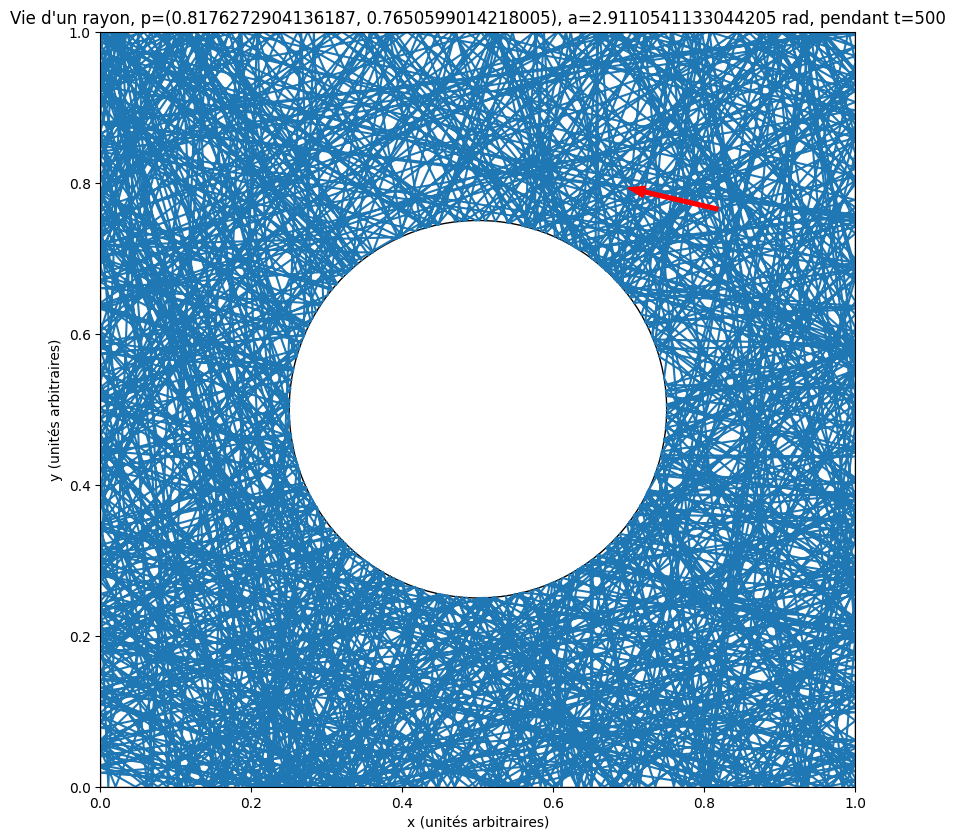

In [33]:
tf=500
p=(lx_sinai/2*(random.random()+1),ly_sinai/2*(random.random()+1))
a=2*np.pi*random.random()

life=ray_life_sinai(tf,p,a)
fig,ax=plt.subplots(figsize=[10,10],dpi=100)
ax.plot(life[:,0],life[:,1])
ax.add_artist(Rectangle((0,0),lx_sinai,ly_sinai,fill=False))
ax.add_artist(Circle((lx_sinai/2,ly_sinai/2),r,fill=False))
ax.set_xlim([0,lx_sinai])
ax.set_ylim([0,ly_sinai])
ax.set_aspect('equal')
ax.set_title('Vie d\'un rayon, p='+str(p)+', a='+str(a)+' rad, pendant t='+str(tf))
ax.set_xlabel('x (unités arbitraires)')
ax.set_ylabel('y (unités arbitraires)')
ax.arrow(life[0,0],life[0,1],life[0,2]/10,life[0,3]/10,width=0.005,color='r',zorder=1000)

En regardant aux tf grands (>10 000), on remarque aisément l'aspect ergodique de cette géométrie. Le cercle central a perturbé la régularité que nous avions pu observer dans le cas du rectangle.

## d) Le stade de Bunimovich
La dernière géométrie que l'on étudiera ici est le stade de Bunimovich. On le schématise de la manière suivante :
<img src="https://i.ibb.co/YN3LPhQ/buni.png">

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Circle,Arrow,Arc

## useful functions
norm2=lambda vec : np.sqrt(vec[0]**2+vec[1]**2)

##core
l,r=3,1 #lengths of the stadium

eps=1E-15*r #adaptative error correction

def ray_life_buni(tf,p=(l/2*random.random(),2*r*(random.random()-.5)),a=np.pi*2*random.random()):
    '''function giving the life of a ray between t=0 and tf as a list of its bouncing points with the outer Bunimovich stadium. 
    Takes tf, and the starting chars as input. By default, they are taken at random'''
    x,y=p[0],p[1]


    vx = np.cos(a)
    vy = np.sin(a)

    bounce_list=[[x,y,vx,vy,0]]
    time=0

    x1=np.array([-l/2,-l/2])
    y1=np.array([r,-r])
    x2=np.array([l/2,l/2])
    y2=np.array([r,-r])

    while time<tf:

        Lambda_list=[]
        
        if vx==0: # avoids div by 0 errors without losing much precision
            vx=eps
        if vy==0:
            vy=eps
            
        #on the plane surfaces, we solve 'p=p0+Lv && p is on one of the segments' the faact that we check segments explains the presence of 0<mu<1.

        den=vy*x1-vy*x2-vx*y1+vx*y2
        Lambda_flat=((x1-x)*(y2-y1)-(y1-y)*(x2-x1))/(vx*(y2-y1)-vy*(x2-x1))
        mu=-(vy*x-vy*x1-vx*y+vx*y1)/den
        for j in range(2):#2 possible solutions
            if Lambda_flat[j]>0 and 0<mu[j]<1:
                Lambda=Lambda_flat[j]
                reftype='flat'
                xy=[x+Lambda_flat[j]*vx,y+Lambda_flat[j]*vy]


        #demi-cercle droit
        A_d=vy**2+vx**2
        B_d=y*vy+x*vx-l*vx/2
        C_d=x**2+y**2+l**2/4-l*x-r**2

        delta_d=B_d**2-A_d*C_d
        if delta_d>=0:
            Lambda_d=(-B_d+np.sqrt(delta_d))/A_d
            Lambda_list.append(Lambda_d)
            side='right'

        #demi-cercle gauche
        A_g=vy**2+vx**2
        B_g=y*vy+x*vx+l*vx/2
        C_g=x**2+y**2+l**2/4+l*x-r**2

        delta_g=B_g**2-A_g*C_g
        if delta_g>=0:
            Lambda_g=(-B_g+np.sqrt(delta_g))/A_g
            Lambda_list.append(Lambda_g)
            side='left'


        Lambda_list=np.array(Lambda_list)
        Lambda_list=Lambda_list[Lambda_list>eps]#the only possible negative values are in position 0 or 1, thus

        xylist=np.array([[x+L*vx,y+L*vy] for L in Lambda_list])

        for i,pt in enumerate(xylist):
            if norm2(pt)>np.sqrt(r**2+l**2/4): # if the point isn't on the inner part of the circles
                xy=pt
                Lambda=Lambda_list[i]
                reftype='circle'


        x=xy[0]
        y=xy[1]

        #now the reflection...
        if reftype=='flat':
            vy=-vy
        elif reftype=='circle':

            vec_i=np.array([vx,vy])

            #normal vector (normalized)
            if side=='right': #if the reflection occurs on the right
                vec_n=np.array([x-l/2,y])/norm2([x-l/2,y]) 
            elif side=='left': #if the reflection occurs on the left
                vec_n=np.array([x+l/2,y])/norm2([x+l/2,y]) 


            #reflection vector

            vec_r=vec_i-2*vec_n*np.vdot(vec_n,vec_i)

            #normalized reflection vector
            vec_r=vec_r/norm2(vec_r)

            #print(vx,vy)

            vx=vec_r[0]
            vy=vec_r[1]

            #print(vx,vy)

        time+=Lambda
        bounce_list.append([x,y,vx,vy,time])
    return np.array(bounce_list)


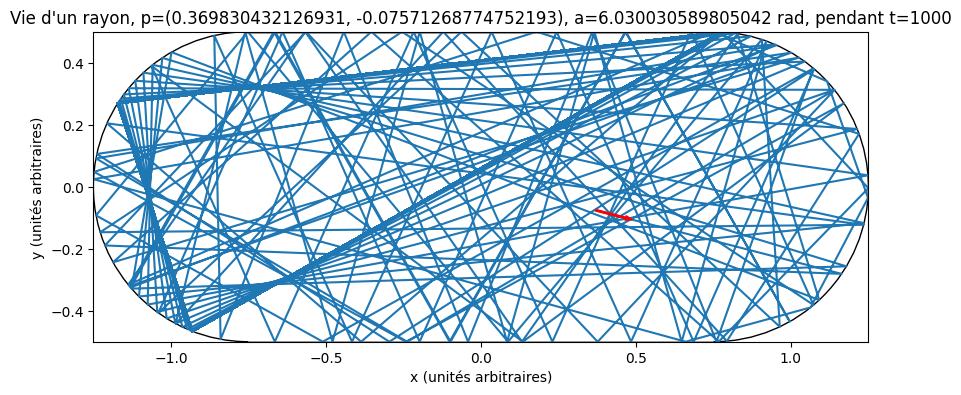

In [10]:
l,r=1.5,.5 #lengths of the stadium
tf=1000

p=(l/2*random.random(),2*r*(random.random()-.5))
a=2*np.pi*random.random()

life=ray_life_buni(tf,p,a)
fig,ax=plt.subplots(figsize=[10,10],dpi=100)
ax.plot(life[:,0],life[:,1])
ax.add_artist(Arrow(-l/2,r,l,0,width=0,fill=False))
ax.add_artist(Arrow(-l/2,-r,l,0,width=0,fill=False))
ax.add_artist(Arc((l/2,0),2*r,2*r,270,0,180,fill=False))
ax.add_artist(Arc((-l/2,0),2*r,2*r,90,0,180,fill=False))
ax.set_xlim([-l/2-r,l/2+r])
ax.set_ylim([-r,r])
ax.set_aspect('equal')
ax.set_title('Vie d\'un rayon, p='+str(p)+', a='+str(a)+' rad, pendant t='+str(tf))
ax.set_xlabel('x (unités arbitraires)')
ax.set_ylabel('y (unités arbitraires)')
ax.arrow(life[0,0],life[0,1],life[0,2]/10,life[0,3]/10,width=0.005,color='r',zorder=1000)

Encore une fois, pour des temps assez longs, on remarque que les arcs de cercle engendrent du chaos. A un temps infini, tout le billiard sera visité. On remarque tout de même à temps courts l'existence de noeuds aux centres des demi-cercles.

# Partie II Onde circulaire

On implémente maintenant des fonctions pour observer la propagation d'une onde circulaire et autres dans ces géométries

In [64]:
def interp(t,t1,t2,p1,p2):
    'fonction d\'interpolation prenant comme entrée t,ti,ti+1,pi,pi+1 et renvoyant p(t)'
    p1,p2=np.array(p1),np.array(p2) #just making sure...
    delta=(t-t1)/(t2-t1)
    p=p1+delta*(p2-p1) #interpolated point
    return p.tolist()

def front_tot(ray_life,n,tf,dt=0.01,p=(0,0)):
    '''renvoie n listes de N=tf/dt points de la vie d\'un rayon, lancé a 2ipi/n chacun, 
    donnant une onde circulaire pour n grand, cette fonction est lourde en mémoire mais 
    permet de ne faire des calculs qu\'une fois'''
    N=int(tf/dt)
    t_list=[i*dt for i in range(N)]
    a_list=[2*np.pi*i/n for i in range(n)]
    onde_list=[]
    for a in a_list:
        ray=ray_life(tf,p,a)#on crée le rayon
        pts=[]#on crée la liste qui stockera TOUS les points à cet angle
        pts_reb=[[item[0],item[1]] for item in ray] #on stocke les coordonnées des points de rebond
        times=ray[:,-1] #on stocke les temps des rebonds
        for i in range(len(times)-1): #on parcoure les rebonds
            t_counter=0
            while t_counter<times[i+1]-times[i] and len(pts)<N: #due to rounding errors, we stop looking after N points for uniformisation, dt needs to be small
                pts.append(interp(times[i]+t_counter,times[i],times[i+1],pts_reb[i],pts_reb[i+1]))
                t_counter+=dt       
        onde_list.append(pts)
    return np.array(onde_list)

def front_t(ray_life,n,t,p=(0,0)):
    "renvoie une liste unique du front a l'i'nstant t"
    a_list=[2*np.pi*i/n for i in range(n)]
    pts=[]#on crée la liste qui stockera TOUS les points
    for a in a_list:
        ray=ray_life(tf,p,a)#on crée le rayon
        pts_reb=[[item[0],item[1]] for item in ray] #on stocke les coordonnées des points de rebond
        times=ray[:,-1] #on stocke les temps des rebonds
        for i in range(len(times)-1): #on parcoure les rebonds
            if times[i]<t<times[i+1]:
                pts.append(interp(t,times[i],times[i+1],pts_reb[i],pts_reb[i+1]))    
    return pts

def dispersity_pts(ray_life,n,tf,theta,delta_theta,dt=0.01,p=(0,0)):
    '''idem que front, mais les rayons sont compris entre theta et theta+dtheta
    Cette fonction permet de voir la dispersion de rayons initiallement proches sous forme de points'''
    N=int(tf/dt)
    t_list=[i*dt for i in range(N)]
    a_list=[theta+delta_theta*i/n for i in range(n)]
    onde_list=[]
    for a in a_list:
        ray=ray_life(tf,p,a)#on crée le rayon
        pts=[]#on crée la liste qui stockera TOUS les points à cet angle
        pts_reb=[[item[0],item[1]] for item in ray] #on stocke les coordonnées des points de rebond
        times=ray[:,-1] #on stocke les temps des rebonds
    
        for i in range(len(times)-1): #on parcoure les rebonds
            t_counter=0
            while t_counter<times[i+1]-times[i] and len(pts)<N: #due to rounding errors, we stop looking after N points for uniformisation, dt needs to be small
                pts.append(interp(times[i]+t_counter,times[i],times[i+1],pts_reb[i],pts_reb[i+1]))
                t_counter+=dt       
        onde_list.append(pts)
    return np.array(onde_list)

def dispersity_rays(ray_life,n,tf,theta,delta_theta,p=(0,0)):
    '''idem que dispersity_pts mais ne renvoie que les points d'impact avec la surface
    Cette fonction permet de voir la dispersion de rayons initiallement proches sous forme de rayons'''
    a_list=[theta+delta_theta*i/n for i in range(n)]
    rays_list=[]
    for a in a_list:
        rays_list.append(ray_life(tf,p,a)) #on ajoute le rayon fraichement créé
    return rays_list

## a) Dispersion (préambule)

Avant les ondes circulaires à proprement dit, on étudie comment trois points aux caractéristiques initiales (v) très proches évoluent dans le temps.

Text(0, 0.5, 'y (unités arbitraires)')

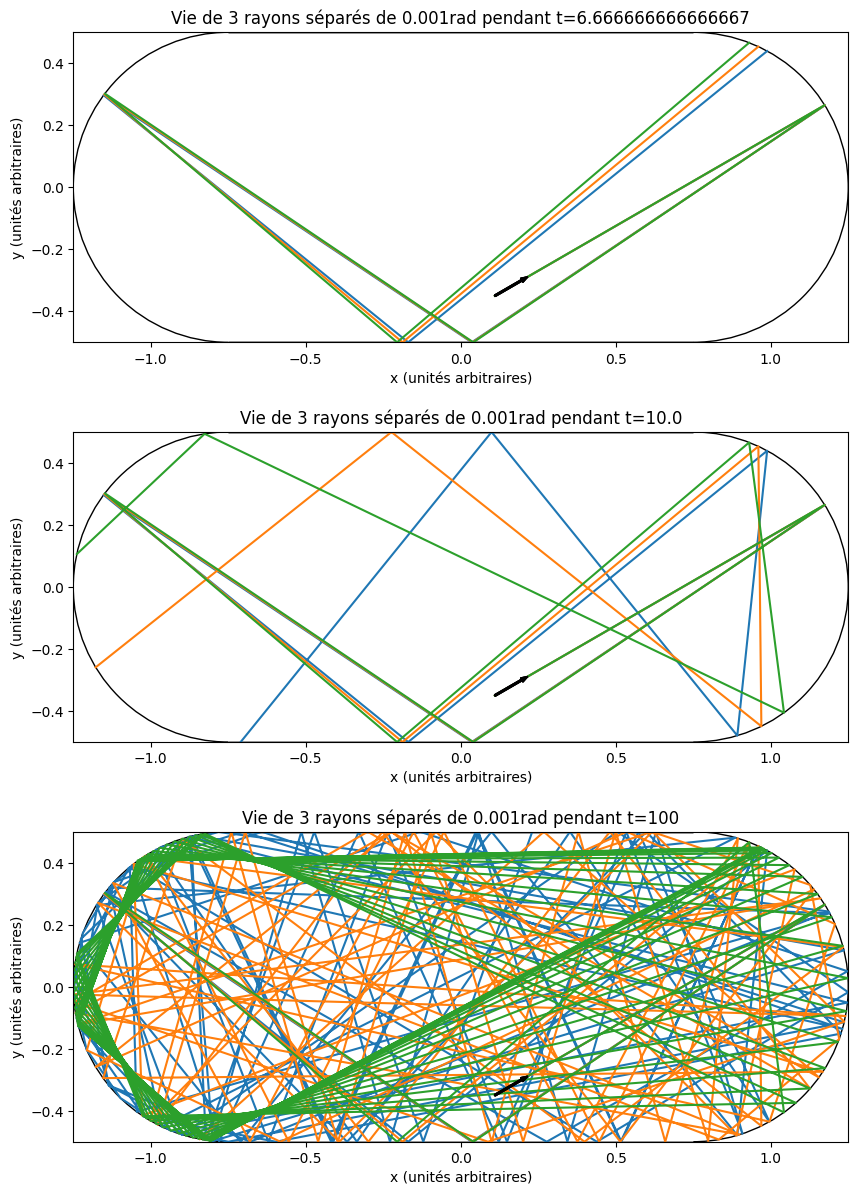

In [12]:
l,r=1.5,.5 #lengths of the stadium

n=3
tf=100
p=(0.11,-0.35)
theta=np.pi/6
delta_theta=0.001


fig,ax=plt.subplots(3,1,figsize=[10,15],dpi=100)

for ray in dispersity_rays(ray_life_buni,n,tf/15,theta,delta_theta,p):
    ax[0].plot(ray[:,0],ray[:,1])
    ax[0].arrow(ray[0,0],ray[0,1],ray[0,2]/10,ray[0,3]/10,width=0.005,color='k',zorder=1000)
    
for ray in dispersity_rays(ray_life_buni,n,tf/10,theta,delta_theta,p):
    ax[1].plot(ray[:,0],ray[:,1])
    ax[1].arrow(ray[0,0],ray[0,1],ray[0,2]/10,ray[0,3]/10,width=0.005,color='k',zorder=1000)
    
for ray in dispersity_rays(ray_life_buni,n,tf,theta,delta_theta,p):
    ax[2].plot(ray[:,0],ray[:,1])
    ax[2].arrow(ray[0,0],ray[0,1],ray[0,2]/10,ray[0,3]/10,width=0.005,color='k',zorder=1000)
    
ax[0].add_artist(Arrow(-l/2,r,l,0,width=0,fill=False))
ax[0].add_artist(Arrow(-l/2,-r,l,0,width=0,fill=False))
ax[0].add_artist(Arc((l/2,0),2*r,2*r,270,0,180,fill=False))
ax[0].add_artist(Arc((-l/2,0),2*r,2*r,90,0,180,fill=False))
ax[0].set_xlim([-l/2-r,l/2+r])
ax[0].set_ylim([-r,r])
ax[0].set_aspect('equal')
ax[0].set_title('Vie de '+str(n)+' rayons séparés de '+str(delta_theta)+'rad pendant t='+str(tf/15))
ax[0].set_xlabel('x (unités arbitraires)')
ax[0].set_ylabel('y (unités arbitraires)')


ax[1].add_artist(Arrow(-l/2,r,l,0,width=0,fill=False))
ax[1].add_artist(Arrow(-l/2,-r,l,0,width=0,fill=False))
ax[1].add_artist(Arc((l/2,0),2*r,2*r,270,0,180,fill=False))
ax[1].add_artist(Arc((-l/2,0),2*r,2*r,90,0,180,fill=False))
ax[1].set_xlim([-l/2-r,l/2+r])
ax[1].set_ylim([-r,r])
ax[1].set_aspect('equal')
ax[1].set_title('Vie de '+str(n)+' rayons séparés de '+str(delta_theta)+'rad pendant t='+str(tf/10))
ax[1].set_xlabel('x (unités arbitraires)')
ax[1].set_ylabel('y (unités arbitraires)')

ax[2].add_artist(Arrow(-l/2,r,l,0,width=0,fill=False))
ax[2].add_artist(Arrow(-l/2,-r,l,0,width=0,fill=False))
ax[2].add_artist(Arc((l/2,0),2*r,2*r,270,0,180,fill=False))
ax[2].add_artist(Arc((-l/2,0),2*r,2*r,90,0,180,fill=False))
ax[2].set_xlim([-l/2-r,l/2+r])
ax[2].set_ylim([-r,r])
ax[2].set_aspect('equal')
ax[2].set_title('Vie de '+str(n)+' rayons séparés de '+str(delta_theta)+'rad pendant t='+str(tf))
ax[2].set_xlabel('x (unités arbitraires)')
ax[2].set_ylabel('y (unités arbitraires)')

Notre onde circulaire va donc vite devenir chaotique dans certains cas

## b) Plus de mémoire ou plus de calcul ?

On a créé plus haut deux fonctions donnant in fine les données nécessaires pour tracer l'évolution d'un front d'onde. Comparons leurs vitesses dans le cas du billiard de Bunimovich

In [13]:
n=10
tf=10
dt=0.1

In [ ]:
%%timeit
front_tot(ray_life_buni,n,tf,dt)

8.8 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Attention ! La prochaine cellule prend plusieurs minutes d'éxecution.

In [ ]:
%%timeit
    for i in range(int(tf/dt)):
        front_t(ray_life_buni,n,i*dt/tf)

426 ms ± 6.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


La version donnant le front d'onde à un instant donné est sans surprise beaucoup plus coûteuse en temps pour le même résultat. En effet, la fonction front_tot appelle la fonction créant les points de rebonds n fois, ainsi que  front_t, n fois également,et cela uniquement, afin de n'avoir les positions du front qu'à l'instant t, là où l'autre fonction avait tout stocké. On aura donc un temps grossièrement tf/dt (!) fois plus long dans la deuxième cellule que dans la première. C'est ce qui va nous inciter à utiliser la fonction totale, malgré le fait que le résultat sera plus difficile à manipuler.

## c) Onde circulaire 2D

C'est parti, on peut enfin tracer l'évolution du front d'onde dans les différentes géométries

## ATTENTION LE CODE QUI SUIT PREND BEAUCOUP (>15mn) DE TEMPS DE CALCUL, AJUSTER (n,tf,dt) SI BESOIN

Avec un bon ordinateur et un peu de temps, vous êtes invités à modifier le mode (type de géométrie de propagation) dans la cellule suivante, pour observer le front d'onde à différents instants dans la cellule encore après (modifier n_frame).

In [66]:
n=5000
tf=20
dt=0.001 #with these settings, uses around 10gb ram

global mode
mode=ray_life_sinai #ray_life_ell,ray_life_sinai,ray_life,buni,ray_life_rect

front=front_tot(mode,n,tf,dt,p=(0.1,0.1)) #no need to specify p for buni and ellipse, for rectangle you can use 

On représente le front à l'instant t (à travers l'image numéro n_frame) :

Text(0.5, 1.0, "Etat du front d'onde circulaire dans la géométrie considérée, t/tf = 0.05")

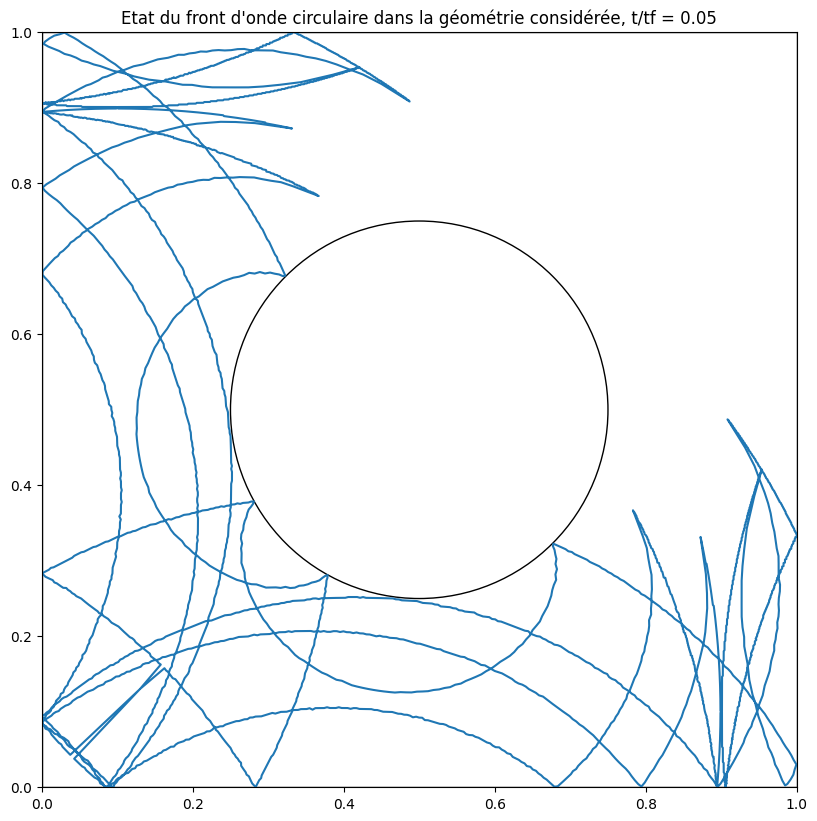

In [70]:
time_proportion=0.05 #nice visuals (with untouched tf): 0.5 for ellipse, 0.1 for buni, 0.05 for sinai
n_frame=int(tf/dt*time_proportion) # the # of the displayed frame
fig,ax=plt.subplots(figsize=(10,10),dpi=100)
ax.plot(front[:,n_frame,0],front[:,n_frame,1])
if mode.__name__=='ray_life_ell':
    ax.add_artist(Ellipse((0,0),2*rx,2*ry,fill=False))
    ax.set_xlim([-rx,rx])
    ax.set_ylim([-ry,ry])
elif mode.__name__=='ray_life_rect':
    ax.add_artist(Rectangle((0,0),lx_rect,ly_rect,fill=False))
    ax.set_xlim([0,lx_rect])
    ax.set_ylim([0,ly_rect])
elif mode.__name__=='ray_life_sinai':
    ax.add_artist(Rectangle((0,0),lx_sinai,ly_sinai,fill=False))
    ax.add_artist(Circle((lx_sinai/2,ly_sinai/2),r,fill=False))
    ax.set_xlim([0,lx_sinai])
    ax.set_ylim([0,ly_sinai])
elif mode.__name__=='ray_life_buni':
    ax.add_artist(Arrow(-l/2,r,l,0,width=0,fill=False))
    ax.add_artist(Arrow(-l/2,-r,l,0,width=0,fill=False))
    ax.add_artist(Arc((l/2,0),2*r,2*r,270,0,180,fill=False))
    ax.add_artist(Arc((-l/2,0),2*r,2*r,90,0,180,fill=False))
    ax.set_xlim([-l/2-r,l/2+r])
    ax.set_ylim([-r,r])

ax.set_aspect('equal')
ax.set_title('Etat du front d\'onde circulaire dans la géométrie considérée, t/tf = '+str(time_proportion))

In [71]:
%%capture 
#just to avoid displaying an empty graph

from matplotlib import rc,animation,rcParams
rc('animation', html='jshtml')
fig,ax=plt.subplots(figsize=(10,10))

rcParams['animation.embed_limit'] = 100 #mb

skipped_frames_percentage=0.95
skipped_frames_value=int(1/(1-skipped_frames_percentage))+1

N_frm=int((tf/dt)/skipped_frames_value)          
          
def frame(n_frame):
    global mode
    
    n_frame_post_skip=int(n_frame*skipped_frames_value)
    
    ax.clear()
    

    if mode==ray_life_ell:
        ax.add_artist(Ellipse((0,0),2*rx,2*ry,fill=False))
        ax.set_xlim([-rx,rx])
        ax.set_ylim([-ry,ry])
        modetxt='Ellipse'
    elif mode==ray_life_rect:
        ax.add_artist(Rectangle((0,0),lx,ly,fill=False))
        ax.set_xlim([0,lx_rect])
        ax.set_ylim([0,ly_rect])
        modetxt='Rectangle'
    elif mode==ray_life_sinai:
        ax.add_artist(Rectangle((0,0),lx,ly,fill=False))
        ax.add_artist(Circle((lx/2,ly/2),r,fill=False))
        ax.set_xlim([0,lx_sinai])
        ax.set_ylim([0,ly_sinai])
        modetxt='Sinaï'
    elif mode==ray_life_buni:
        ax.add_artist(Arrow(-l/2,r,l,0,width=0,fill=False))
        ax.add_artist(Arrow(-l/2,-r,l,0,width=0,fill=False))
        ax.add_artist(Arc((l/2,0),2*r,2*r,270,0,180,fill=False))
        ax.add_artist(Arc((-l/2,0),2*r,2*r,90,0,180,fill=False))
        ax.set_xlim([-l/2-r,l/2+r])
        ax.set_ylim([-r,r])
        modetxt='Bunimovich'
    
    ax.set_title('Animation de la propagation d\'une onde circulaire dans la géométrie '+modetxt)
    ax.plot(front[:,n_frame_post_skip,0],front[:,n_frame_post_skip,1])
    ax.set_aspect('equal')
anim=animation.FuncAnimation(fig,frame,frames=N_frm,blit=False,repeat=True)

Embed animation (might hit frame limit due to animation size limit if skipped frame proportion is too low)

In [ ]:
anim

Saved animation 

In [72]:
writer = animation.writers['ffmpeg'](fps=30, metadata=dict(artist='Me'), bitrate=1000)
filename = 'Animation_'+mode.__name__+'.mp4'
anim.save(filename, writer=writer)

Vu que ces animations et calculs sont couteux en temps et en mémoire, nous fournissons différentes animations dans toutes les géométries explorées (pièces jointes). 

On remarque notamment que, dans la version de Sinaï, le rayon se disperse tellement qu'il cause la disparition complète du cercle central. On ne peut même plus parler d'onde dans ce cas

## d) Tests 3D

On se propose enfin d'étudier une onde sphérique à proprement dit dans un billiard de Sinaï 3D. Pour se faire, on adapte légèrement le code précédent :

In [52]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Circle

## useful functions
norm2=lambda vec : np.sqrt(vec[0]**2+vec[1]**2+vec[2]**2)
def normal(x,y,z,lx,ly,lz) :
    normal=np.array([x-lx/2,y-ly/2,z-lz/2])
    return normal/norm2(normal)
##core

eps=1E-14
tf=500

lx,ly,lz=1,1,1 #lengths of the parallelepipedoid (?)
r=0.25 #radius of the sphere
def ray_life(tf,p=(lx/2*(random.random()+1),ly/2*(random.random()+1),lz/2*(random.random()+1)),a=np.pi*2*random.random(),phi=np.pi*random.random()):
    x,y,z=p[0],p[1],p[2] #initial position

    a=a%(2*np.pi)
    phi=phi%(np.pi)

    while norm2([lx/2-x,ly/2-y,lz/2-z])<r:
        x,y,z=lx/2*(random.random()+1),ly/2*(random.random()+1),lz/2*(random.random()+1) #outside the center circle

    vx = np.sin(phi)*np.cos(a)
    vy = np.sin(phi)*np.sin(a)
    vz = np.cos(phi) #starting speeds from starting angles in polar coordinates

    bounce_list=[[x,y,z,vx,vy,vz,0]]
    time=0

    while time<tf:

        reftype='flat'#we assume the reflection is on the walls

        A=vx**2+vy**2+vz**2
        B=x*vx+y*vy+z*vz-vx*lx/2-vy*ly/2-vz*lz/2
        C=x**2+y**2+z**2+(lx/2)**2+(ly/2)**2+(lz/2)**2-x*lx-y*ly-z*lz-r**2

        delta=B**2-A*C



        if delta>=0: 
            Lambda=(-B-np.sqrt(delta))/A
            if Lambda>0:# if the path of the particle meets the sphere

                reftype='circle' # its reflected on a spherical edge
                x=x+Lambda*vx
                y=y+Lambda*vy
                z=z+Lambda*vz

                vec_i=np.array([vx,vy,vz])
                #normal vector (normalized)
                vec_n=normal(x,y,z,lx,ly,lz) 

                #reflection vector

                vec_r=vec_i-2*vec_n*np.vdot(vec_n,vec_i)

                #normalized reflection vector
                vec_r=vec_r/norm2(vec_r)




                vx=vec_r[0]
                vy=vec_r[1]
                vz=vec_r[2]


        if reftype=='flat':

            Lambda_list=[] #every possible lambda value for the walls
            if vy!=0:
                Lambda_list.append((ly-y)/vy)
                Lambda_list.append(-y/vy)
            if vx!=0:
                Lambda_list.append((lx-x)/vx)
                Lambda_list.append(-x/vx)
            if vz!=0:
                Lambda_list.append((lz-z)/vz)
                Lambda_list.append(-z/vz)

            Lambda_list=np.array(Lambda_list)

            Lambda_list=Lambda_list[Lambda_list>eps]#keeping the positive ones

            xlist=x+Lambda_list*vx #rounding the position values for easier testing
            xlist[abs(xlist)<eps]=0
            xlist[abs(xlist-lx)<eps]=lx

            ylist=y+Lambda_list*vy
            ylist[abs(ylist)<eps]=0
            ylist[abs(ylist-ly)<eps]=ly

            zlist=z+Lambda_list*vz
            zlist[abs(zlist)<eps]=0
            zlist[abs(zlist-lz)<eps]=lz


            if len(Lambda_list)==3:
                xylist=np.array([[xlist[0],ylist[0],zlist[0]],[xlist[1],ylist[1],zlist[1]],[xlist[2],ylist[2],zlist[2]]])
            elif len(Lambda_list)==2:
                xylist=np.array([[xlist[0],ylist[0],zlist[0]],[xlist[1],ylist[1],zlist[1]]])
            else :
                xylist=np.array([[xlist[0],ylist[0],zlist[0]]])
            #print(Lambda_list)
            #print(xylist)

            td_index=[] #indexes of the values that are out of the boundaries
            for i,pos in enumerate(xylist):
                if pos[0]>lx or pos[0]<0 or pos[1]>ly or pos[1]<0 or pos[2]>lz or pos[2]<0:
                    td_index.append(i)


            xylist=np.delete(xylist,td_index) #deleting the incorrect values
            Lambda_list=np.delete(Lambda_list,td_index)            
            Lambda=Lambda_list[0] #if everything went smoothly; only one value remains
            x=x+Lambda*vx
            y=y+Lambda*vy
            z=z+Lambda*vz

            #easy reflection on the walls once again
            if abs(x)<eps or abs(x-lx)<eps:
                vx=-vx
            elif abs(y)<eps or abs(y-ly)<eps:
                vy=-vy
            elif abs(z)<eps or abs(z-lz)<eps:
                vz=-vz

        time+=abs(Lambda)
        bounce_list.append([x,y,z,vx,vy,vz,time])
    return np.array(bounce_list)
 
def interp(t,t1,t2,p1,p2):
    'fonction d\'interpolation moins générale, prenant comme entrée t,ti,ti+1,pi,pi+1'
    p1,p2=np.array(p1),np.array(p2) #just making sure...
    delta=(t-t1)/(t2-t1)
    p=p1+delta*(p2-p1)
    return p.tolist()

def fibonacci(n):
    '''renvoie les angles theta,phi de n points quasi également espacés sur une sphère unité, adapté de http://extremelearning.com.au/how-to-evenly-distribute-points-on-a-sphere-more-effectively-than-the-canonical-fibonacci-lattice/'''
    
    if n>=890:
        eps_=10
    elif n>=177:
        eps_=10/3
    elif n>=24:
        eps_=4/3
    else:
        eps_=1/3  
    
    phi_g = (1 + np.sqrt(5))/2  # golden ratio
    i=np.arange(0,n)
    tet=2*np.pi*i/phi_g
    phi=np.arccos(1-2*(i+eps_)/(n-1+2*eps_))
    return (tet,phi)

def front3D(n,tf,dt=0.01,p=(lx/2*(random.random()+1),ly/2*(random.random()+1),lz/2*(random.random()+1))):
    'renvoie la liste de tf/dt points de la vie de n rayons'
    N=int(tf/dt)
    t_list=[i*dt for i in range(N)]
    a_list=[2*np.pi*i/n for i in range(n)]
    onde_list=[]
    angles=fibonacci(n)
    tet=angles[0]
    phi=angles[1]
    for i in range(n):
        ray=ray_life(tf,p,tet[i],phi[i])#on crée le rayon
        pts=[]#on crée la liste qui stockera TOUS les points à cet angle
        pts_reb=[[item[0],item[1],item[2]] for item in ray] #on stocke les coordonnées des points de rebond
        times=ray[:,-1] #on stocke les temps des rebonds
        for j in range(len(times)-1): #on parcoure les rebonds
            t_counter=0
            while t_counter<times[j+1]-times[j] and len(pts)<N:
                pts.append(interp(times[j]+t_counter,times[j],times[j+1],pts_reb[j],pts_reb[j+1]))
                t_counter+=dt       
        onde_list.append(pts)
    return np.array(onde_list)

On notera dans la cellule précédente l'apparition d'une fonction fibonacci(n) qui renvoie n couple d'angles (theta,phi) donnant des points "quasiment" régulièrement espacés sur une sphère. On observe ce bon fonctionnement ci-après.

Text(0.5, 0.92, 'fibonacci function (almost) regularly spacing n= 2500 pts on a unit sphere')

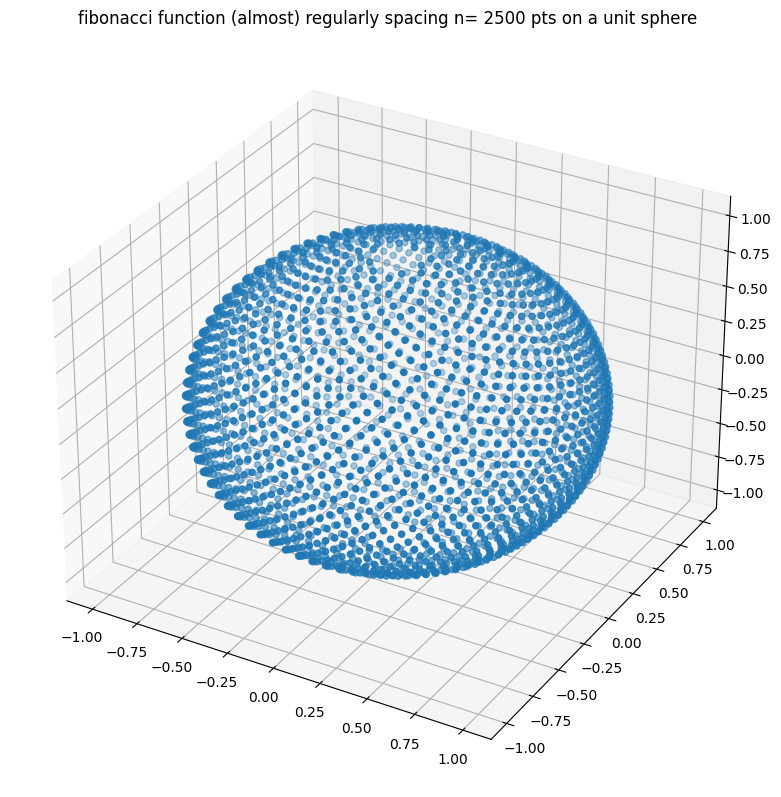

In [49]:
fig=plt.figure(figsize=[10,10],dpi=100)
ax=fig.add_subplot(projection='3d')
angles=np.array(fibonacci(2500))
tet=np.array(angles[0])
phi=np.array(angles[1])
x=np.sin(phi)*np.cos(tet)
y=np.sin(phi)*np.sin(tet)
z=np.cos(phi)
ax.scatter(x,y,z)
ax.set_title('fibonacci function (almost) regularly spacing n= 2500 pts on a unit sphere')

Parfait, affichons tout de même la vie d'un rayon unique en 3D comme précédemment :

Text(0.5, 0.83, "Vie d'un rayon, temps courts et longs")

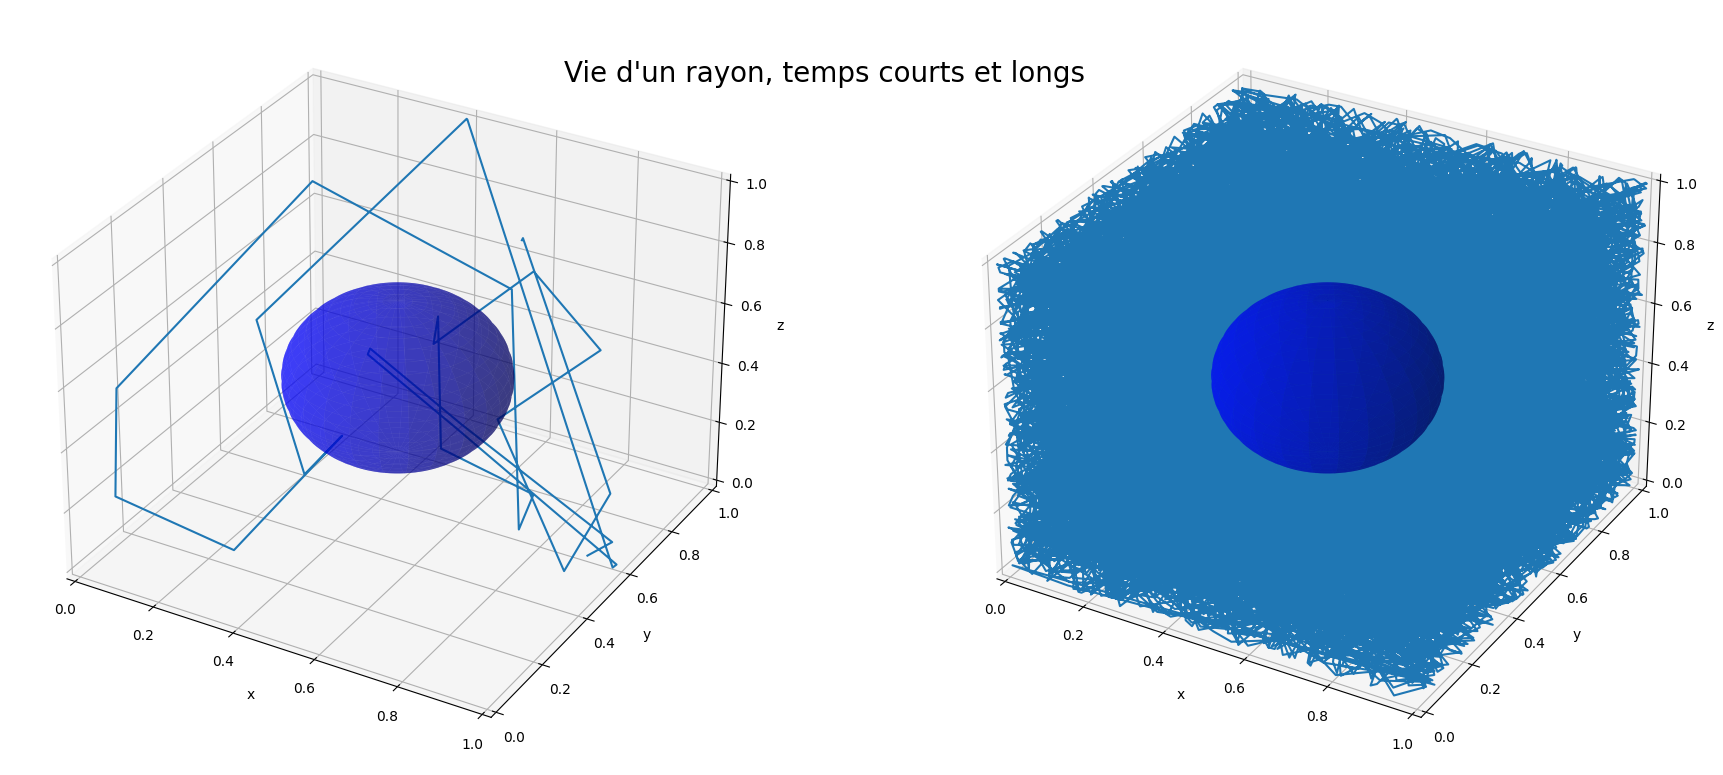

In [53]:
from mpl_toolkits.mplot3d import Axes3D

bounce_list=ray_life(5000)

fig=plt.figure(figsize=[22,10],dpi=100)
ax=fig.add_subplot(122,projection='3d')
axp=fig.add_subplot(121,projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = r * np.outer(np.cos(u), np.sin(v)) + lx/2
y = r * np.outer(np.sin(u), np.sin(v)) + ly/2
z = r * np.outer(np.ones(np.size(u)), np.cos(v)) + lz/2
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
axp.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)

axp.plot(bounce_list[:30,0],bounce_list[:30,1],bounce_list[:30,2])
ax.plot(bounce_list[:,0],bounce_list[:,1],bounce_list[:,2])


ax.set_xlim([0,lx])
ax.set_ylim([0,ly])
ax.set_zlim([0,lz])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

axp.set_xlim([0,lx])
axp.set_ylim([0,ly])
axp.set_zlim([0,lz])
axp.set_xlabel('x')
axp.set_ylabel('y')
axp.set_zlabel('z')

fig.suptitle('Vie d\'un rayon, temps courts et longs',y=0.83,size=20)

Tout va bien, la version 3D du billiard de Sinaï est toujours ergodique. On peut observer l'évolution d'une onde sphérique dans la cavité. 

In [54]:
n=20000 #beware of ram usage
tf=5
dt=0.01

front3D_=front3D(n,tf,dt,(.25,.25,.75))

Text(0.5, 0.92, 'Onde sphérique 3D dans une géométrie Sinaï, t/tf= 0.004')

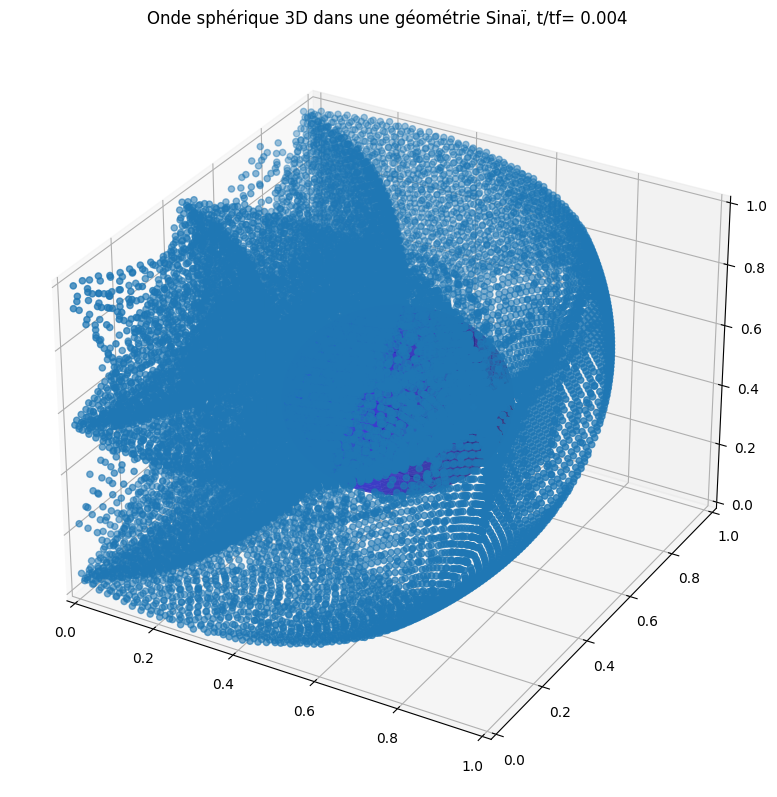

In [78]:
time_proportion=0.1 #0 = start, 1 = end


n_frame=int(tf/dt*time_proportion)-1

fig=plt.figure(figsize=[10,10],dpi=100)
ax=fig.add_subplot(111,projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = r * np.outer(np.cos(u), np.sin(v)) +lx/2
y = r * np.outer(np.sin(u), np.sin(v)) +ly/2
z = r * np.outer(np.ones(np.size(u)), np.cos(v)) +lz/2

ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)
ax.set_xlim([0,lx])
ax.set_ylim([0,ly])
ax.set_zlim([0,lz])

ax.scatter3D(front3D_[:,n_frame,0],front3D_[:,n_frame,1],front3D_[:,n_frame,2])
ax.set_title('Onde sphérique 3D dans une géométrie Sinaï, t/tf= '+str(time_proportion))